In [1]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 71.1 MB/s eta 0:00:00


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw

# All we need for clustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# The result of this code will be:
working_library=[]
with open('pak1ligands.smi','r') as file:
    for index,line in enumerate(file):
        if 0<index<=1: # Kee the fist smile code as example
            print (index, line.split())

1 ['Cc1n[nH]c2sc(C(=O)NCCc3ccc(Cl)cc3)cc12', 'CHEMBL1998414']


In [4]:
working_library=[]
with open('pak1ligands.smi','r') as file:
    for index,line in enumerate(file):
        if 0<index<=20000: # Molecules we want (0 is omitted because the fist line (0) of file is the header, not SMILES code)
            mol=Chem.MolFromSmiles(line.split()[0]) # Converting SMILES codes into rdkit mol 
            mol.SetProp('_Name',line.split()[1]) # Adding the name for each molecule
            working_library.append(mol)

C:\Users\91830\anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


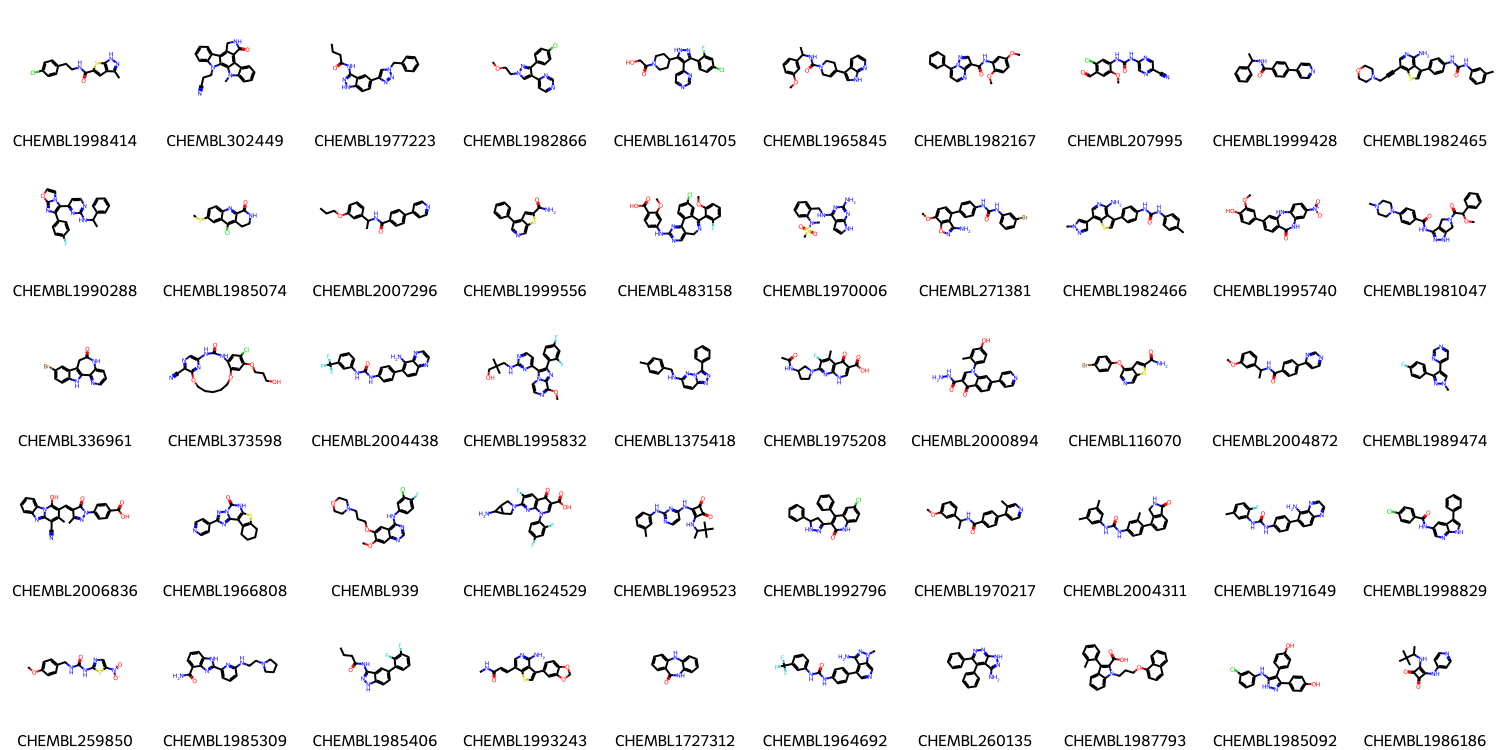

In [5]:
Draw.MolsToGridImage(working_library,molsPerRow=10,subImgSize=(150,150),legends=[mol.GetProp('_Name') for mol in working_library])

In [6]:
fps= [FingerprintMols.FingerprintMol(mol) for mol in working_library]
print(len(working_library))
print(len(fps))

1740
1740


In [7]:
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.3116788321167883

In [8]:
size=len(working_library)
hmap=np.empty(shape=(size,size))
table=pd.DataFrame()
for index, i in enumerate(fps):
    for jndex, j in enumerate(fps):
        similarity=DataStructs.FingerprintSimilarity(i,j)
        hmap[index,jndex]=similarity
        table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity

C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity
C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity
C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly 

C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity
C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity
C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly 

C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity
C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity
C:\Users\91830\AppData\Local\Temp\ipykernel_7540\1357692062.py:8: PerformanceWarning: DataFrame is highly 

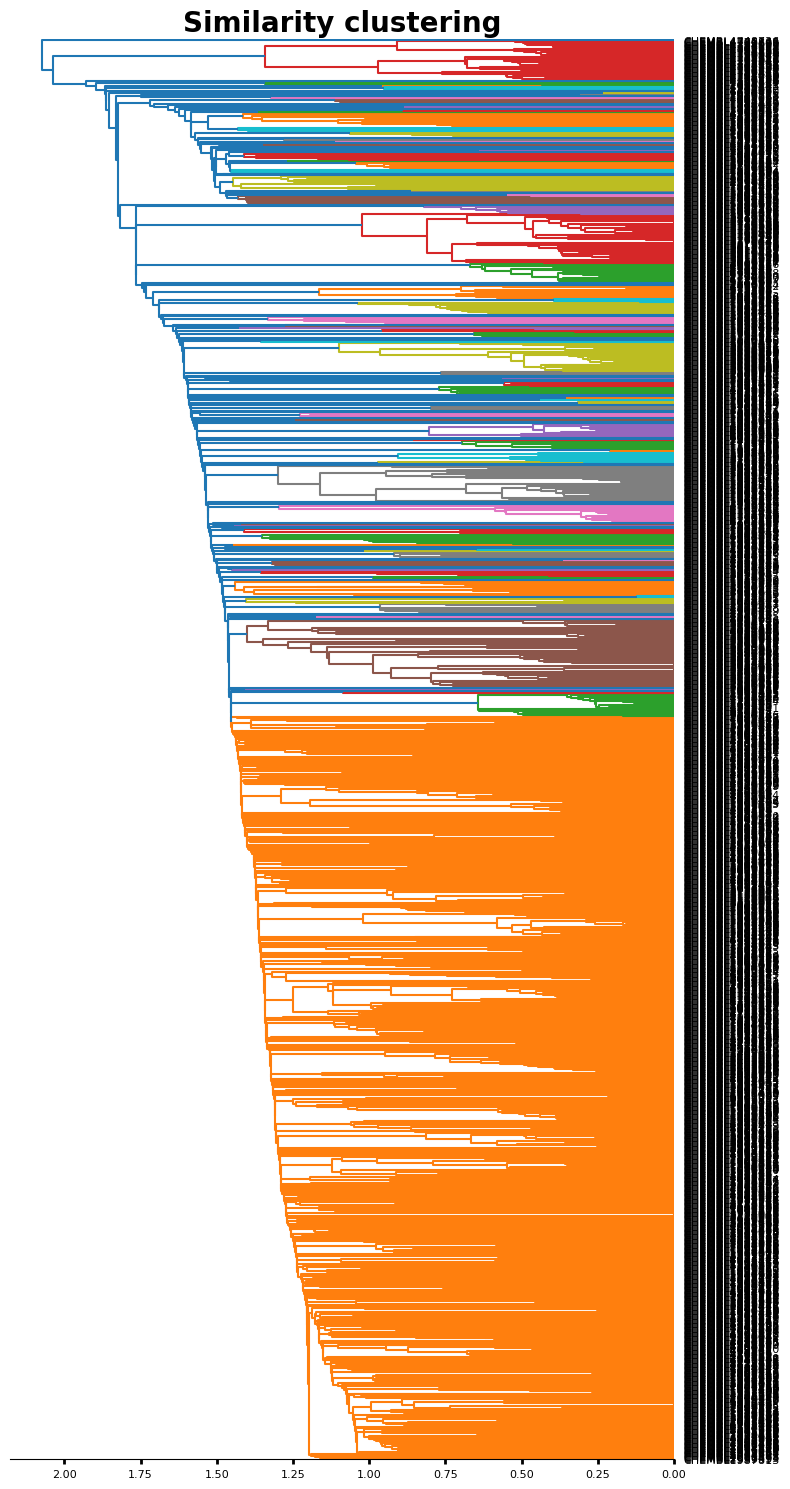

In [9]:
linked = linkage(hmap,'single')
labelList = [mol.GetProp('_Name') for mol in working_library]
plt.figure(figsize=(8,15))

ax1=plt.subplot()
o=dendrogram(linked,  
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.title('Similarity clustering',fontsize=20,weight='bold')
plt.tick_params ('both',width=2,labelsize=8)
plt.tight_layout()
plt.show() 

In [10]:


# This will give us the clusters in order as the last plot
new_data=list(reversed(o['ivl']))

# we create a new table with the order of HCL
hmap_2=np.empty(shape=(size,size))
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        hmap_2[index,jndex]=table.loc[i].at[j]



[]

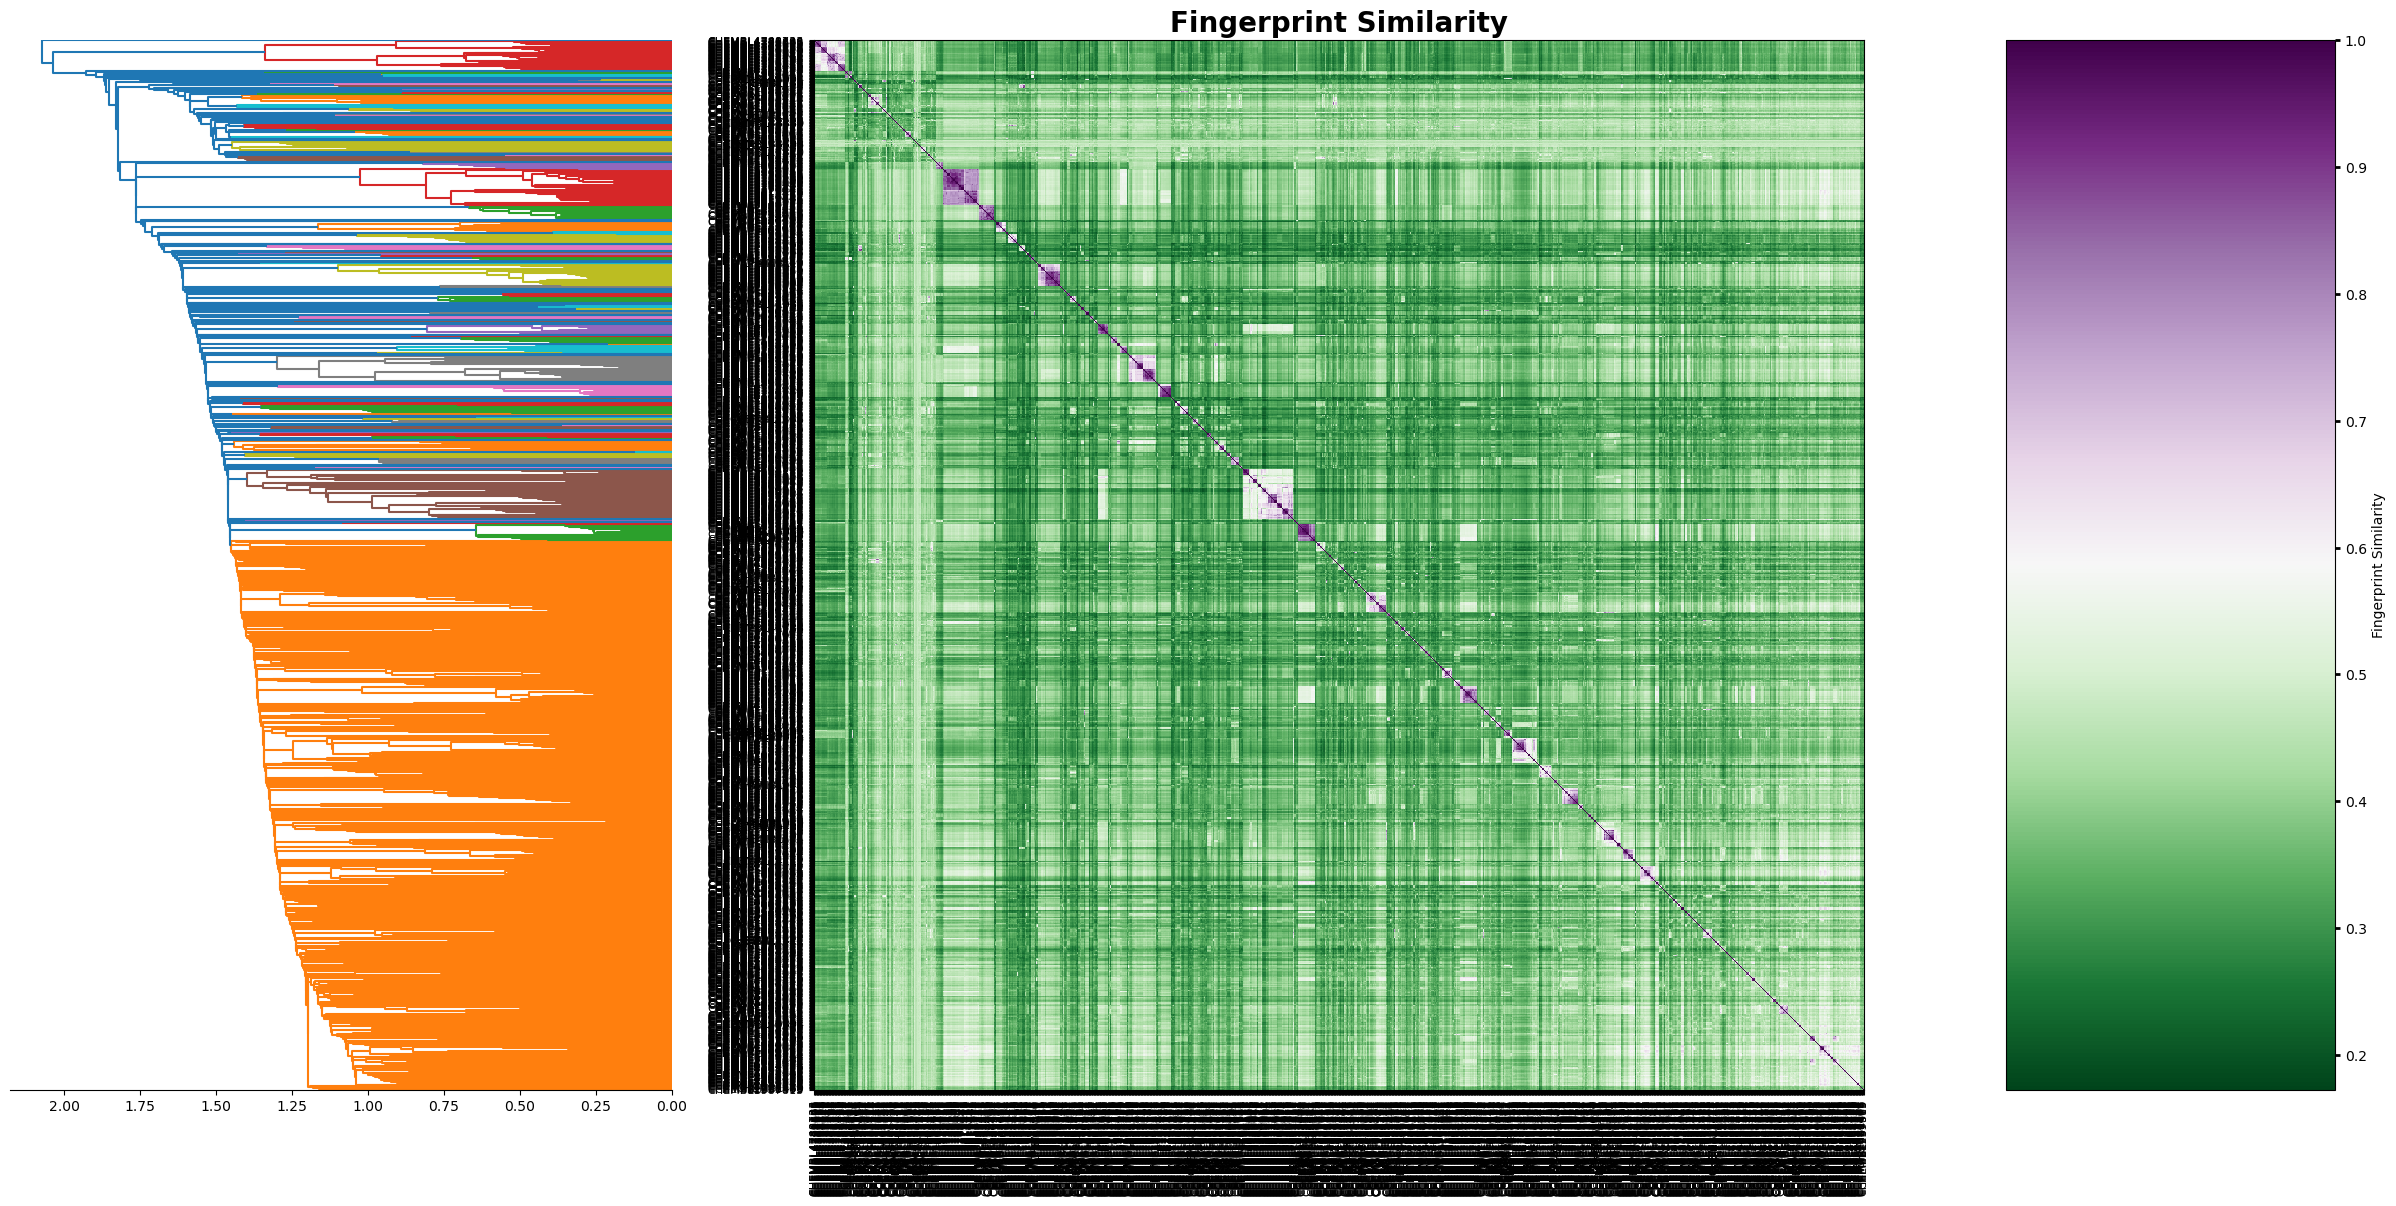

In [11]:
figure= plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(2,7)
gs1.update(wspace=0.01)
ax1 = plt.subplot(gs1[0:-1, :2])
dendrogram(linked, orientation='left', distance_sort='descending',show_leaf_counts=True,no_labels=True)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(gs1[0:-1,2:6])
f=ax2.imshow (hmap_2, cmap='PRGn_r', interpolation='nearest')

ax2.set_title('Fingerprint Similarity',fontsize=20,weight='bold')
ax2.set_xticks (range(len(new_data)))
ax2.set_yticks (range(len(new_data)))
ax2.set_xticklabels (new_data,rotation=90,size=8)
ax2.set_yticklabels (new_data,size=8)

ax3 = plt.subplot(gs1[0:-1,6:7])
m=plt.colorbar(f,cax=ax3,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
m.set_label ('Fingerprint Similarity')

plt.tick_params ('both',width=2)
plt.plot()